# ДОМАШНЯЯ РАБОТА №6

ДАНИЛЬЧЕНКО ВАДИМ

In [1]:
# Задание 1: работа с датафреймом

"""
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. 
Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. 
Если поисковый запрос не содержит названия города, то ставим 'undefined'.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

Результат классификации запишите в отдельный столбец region.
"""

"\nИспользуем файл keywords.csv.\n\nНеобходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.\n\nПравила распределения по регионам Центр, Северо-Запад и Дальний Восток:\n\ngeo_data = {\n\n    'Центр': ['москва', 'тула', 'ярославль'],\n\n    'Северо-Запад': ['петербург', 'псков', 'мурманск'],\n\n    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']\n\n}\n\nРезультат классификации запишите в отдельный столбец region.\n"

In [353]:
#Решение: не очень понял задачу, поэтому додумал по своему и решил xD - нашел сайт со списком городов и принадлежностью к 
#         региону, далее нашел соответствие каждому первому пересечению слова с моим списком и вывел соответствующие регионы
#         для первого элемента в новый столбец. Под основным решением словарь с группировкой полученных городов
#         p.s: есть, конечно, недодуманные места вроде 338 строки, где фамилия проходит по условию, но не усложнял без надобности 

import numpy as np
#скачаем список городов с принадлежностью к регионам
data=pd.read_html('http://hramy.ru/regions/city_reg.htm')[0]
#выберем только полезные столбцы и строки, адекватно назовем
regions=data.filter(items=[0,3]).loc[5:1171]
regions.columns=['city','region']
#добавим столбец с приведенными к нижнему регистру названиями городов
regions['city_lower']=regions.city.str.lower()
#ds.keyword.str.contains('|'.join(regions['city_lower'])) # не получается сделать поиск слова в строке, т.к.к ругается на названия городов через дефис, пока не знаю как обойти иначе
ls=[] #region
ls2=[] #city
flag=0 #для проверки занесения слова в список
i=0
for row in ds.keyword:
    #print('row: '+str(row))
    try:
        if regions.city_lower.isin(row.split(' ')).any():
            for elem in row.split(' '):
                # как оказалось может быть два пересечения в одном запросе, а мы делаем простой пример работы с пандас, берем только первое пересечение
                if regions[regions.city_lower==elem]['region'].head(1).empty==False: 
                    if flag==0:
                        #print('результат {} для элемента {} проверка {}'.format(regions[regions.city_lower==elem]['region'].head(1),elem, regions[regions.city_lower==elem]['region'].head(1).empty))
                        # т.к. может быть несколько городов с одним названием и мы не хотим усложнять на данном этапе, то берем только первый 
                        ls.append(regions[regions.city_lower==elem]['region'].head(1).item())
                        ls2.append(elem)
                        flag=1
    except AttributeError:
        print('err: '+str(row))
        flag=0
    #обнулим флаг, если уже записали или поставим NaN
    if flag==0 :
        ls.append(np.NaN)
        ls2.append(np.NaN)
    else:
        flag=0
#    i+=1
#    if i>=1000:
#print(len(ls))
#        break
ds['region']=ls
ds['city']=ls2
ds[ds.region.isnull()==False].head()

err: 0


,keyword,shows,region,city
127,авито москва,979292,Москва Город,москва
338,сергей королев,464997,Московская Область,королев
362,авито самара,440746,Самарская Область,самара
390,авито волгоград,408970,Волгоградская Область,волгоград
396,авито пермь,406796,Пермский Край,пермь


In [434]:
#создадим словарь с группировкой присутствующих городов в поисковом запросе по региону
geo_data={}
joined = pd.merge(ds, regions, on=['region','city'], how='left')
joined=joined[joined.region.isnull()==False].filter(items=['region','city'])
for line in joined.region.unique():
    for elem in joined[joined['region']==line]['city']:
        if line not in geo_data.keys():
            geo_data.setdefault(line,[])
        if elem not in geo_data[line]:
            geo_data[line].append(elem)

geo_data

{'Москва Город': ['москва', 'московский', 'зеленоград', 'щербинка'],
 'Московская Область': ['королев',
  'домодедово',
  'чехов',
  'серпухов',
  'юбилейный',
  'подольск',
  'химки',
  'одинцово',
  'красногорск',
  'шатура',
  'балашиха',
  'мытищи',
  'люберцы',
  'коломна',
  'лыткарино',
  'воскресенск',
  'жуковский',
  'ногинск',
  'раменское',
  'дзержинский',
  'снегири',
  'истра',
  'электросталь',
  'солнечногорск',
  'фрязино',
  'железнодорожный',
  'дмитров',
  'долгопрудный',
  'реутов',
  'звенигород',
  'щелково',
  'лобня',
  'ивантеевка',
  'клин',
  'егорьевск',
  'дубна',
  'красноармейск',
  'пересвет',
  'пушкино',
  'яхрома',
  'видное',
  'волоколамск',
  'ступино',
  'климовск',
  'можайск',
  'котельники',
  'апрелевка',
  'черноголовка',
  'луховицы',
  'зарайск',
  'протвино',
  'бронницы',
  'кубинка'],
 'Самарская Область': ['самара',
  'тольятти',
  'сызрань',
  'новокуйбышевск',
  'похвистнево',
  'чапаевск',
  'жигулевск',
  'отрадный'],
 'Волгоградс

In [435]:
#Задание 2: функция
"""
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
    - оценка 2 и меньше - низкий рейтинг
    - оценка 4 и меньше - средний рейтинг
    - оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class
"""
data=pd.read_csv('ratings.csv','r', delimiter=',')
data.head()

'\nНапишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:\n    - оценка 2 и меньше - низкий рейтинг\n    - оценка 4 и меньше - средний рейтинг\n    - оценка 4.5 и 5 - высокий рейтинг\n\nРезультат классификации запишите в столбец class\n'

In [463]:
#Решение1: принимает весь датафрейм - отрабатвает быстрее, чем если передавать в функцию построчно
def raiting_class_simple(some_data):
    ls=[]
    for line in data.rating:
        if line>=4.5:
            ls.append('высокий рейтинг')
        elif 2<line<4.5:
            ls.append('средний рейтинг')
        elif line<=2:
            ls.append('низкий рейтинг')
    data['class']=ls
    #data.loc[100:110]
    return data

In [464]:
data2=raiting_class_simple(data)
data2.loc[100:110]

,userId,movieId,rating,timestamp,class,class2
100,3,296,4.5,1298862418,высокий рейтинг,высокий рейтинг
101,3,318,5.0,1298862121,высокий рейтинг,высокий рейтинг
102,3,355,2.5,1298861589,средний рейтинг,средний рейтинг
103,3,356,5.0,1298862167,высокий рейтинг,высокий рейтинг
104,3,377,2.5,1298923242,средний рейтинг,средний рейтинг
105,3,527,3.0,1298862528,средний рейтинг,средний рейтинг
106,3,588,3.0,1298922100,средний рейтинг,средний рейтинг
107,3,592,3.0,1298923247,средний рейтинг,средний рейтинг
108,3,593,3.0,1298921840,средний рейтинг,средний рейтинг
109,3,595,2.0,1298923260,низкий рейтинг,низкий рейтинг


In [457]:
#Решение2: передает в функцию построчно
def raiting_class(row):
    if row.rating>=4.5:
        return 'высокий рейтинг'
    elif 2<row.rating<4.5:
        return 'средний рейтинг'
    elif row.rating<=2:
        return 'низкий рейтинг'

In [466]:
data['class2']=data.apply(raiting_class, axis=1)
data.loc[100:110]

,userId,movieId,rating,timestamp,class,class2
100,3,296,4.5,1298862418,высокий рейтинг,высокий рейтинг
101,3,318,5.0,1298862121,высокий рейтинг,высокий рейтинг
102,3,355,2.5,1298861589,средний рейтинг,средний рейтинг
103,3,356,5.0,1298862167,высокий рейтинг,высокий рейтинг
104,3,377,2.5,1298923242,средний рейтинг,средний рейтинг
105,3,527,3.0,1298862528,средний рейтинг,средний рейтинг
106,3,588,3.0,1298922100,средний рейтинг,средний рейтинг
107,3,592,3.0,1298923247,средний рейтинг,средний рейтинг
108,3,593,3.0,1298921840,средний рейтинг,средний рейтинг
109,3,595,2.0,1298923260,низкий рейтинг,низкий рейтинг


In [1]:
#Задание 3
"""
Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime понимается 
разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.
"""

'\nПосчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime понимается \nразница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.\n'

In [228]:
#Решение
from datetime import datetime
import pandas as pd
datetime.fromtimestamp(1535749200)
ds=pd.read_csv('ratings.csv', 'r', delimiter=',')
#ds[ds['userId']==2].timestamp.min() #проверочка
#сгруппируем по userId и посчитаем количество записей на пользователя
groups=ds.groupby('userId').rating.count().reset_index()
#оставим только пользователей с количеством оценок более 100
users=groups[groups['rating']>=100]['userId'].tolist()
#выведем первое время выставления оценки и последнее
ds2=ds[ds['userId'].isin(users)].groupby('userId').agg({'timestamp':['min', 'max'], 'rating':'count'})
#запишем в список прошедшее время между первой и последней записью о пользователе
ls=[]
for i in range(0,len(ds2)):
    ls.append(datetime.fromtimestamp(ds2.timestamp.reset_index()['max'][i])-datetime.fromtimestamp(ds2.timestamp.reset_index()['min'][i]))
#посчитаем среднее количество дней на одного для наших киноманов
cnt=0
from datetime import timedelta
summ=timedelta(0,0,0)
for i in ls:
    summ+=i
    cnt+=1
summ.days/cnt
f'среднее значение Lifetime для киноманов составляет {summ.days/cnt:.0f} дней'

'среднее значение Lifetime для киноманов составляет 455 дней'

In [229]:
#Задание 4
"""
Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, 
используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма 
его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. 
Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
    - для каждой строки пройдите по всем годам списка years
    - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга
"""

'\nЗадание 4\nЕсть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.\n\nПри этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:\n\n1. В переменную years запишите список из всех годов с 1950 по 2010.\n\n2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:\n    - для каждой строки пройдите по всем годам списка years\n    - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска\n    - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год\n\n3. Запишите год выпуска фильма по алгоритму п

In [401]:
#Решение
#загрузим нужные данные
data_ratings=pd.read_csv('ratings.csv', 'r', delimiter=',')
data_movies=pd.read_csv('movies.csv', 'r', delimiter=',')

In [403]:
#создадим функицю, которая будет проверять год в названии фильма и все значения в диапазоне 1950-2010 отмечать соответствущим 
#годом, остальные отмечать как 1900
def production_year(film):
    years=range(1950,2010)
    val=[yr for yr in years if str(yr) in film['title']]
    if val:
        return val[0]
    else:
        return 1900

In [404]:
#запишем в новый столбец года, которые распределила функция
data_movies['year']=data_movies.apply(production_year, axis=1)

#проверим - найдем парочку фильмов без названия и выведем конечное поле с годом по индексу, должно быть 1900 ---- вставить вконец
#data_movies=pd.read_csv('movies.csv', 'r', delimiter=',')
#dt2=data_movies[~data_movies['title'].str.contains('1')]
#dt2[~dt2['title'].str.contains('2')].head()
#data_movies['year'][9063]==1900
#результат - True

#объединим две датафрейма, чтобы посчитать средний рейтинг по группировке года
joined=data_movies.merge(data_ratings, on='movieId', how='left')
jd=joined.groupby('year').rating.mean().reset_index()
jd.sort_values('rating', ascending=False)

,year,rating
8,1957,4.014241
23,1972,4.011136
3,1952,4.000000
5,1954,3.994220
2,1951,3.983539
25,1974,3.978704
13,1962,3.952446
1,1950,3.915254
28,1977,3.905786
15,1964,3.841492


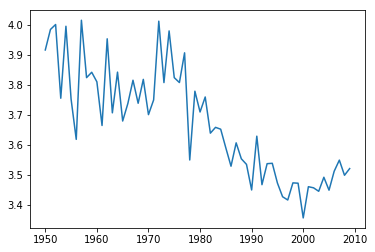

In [424]:
#на самом деле плохо видно, но средний рейтинг действитетельно ухудшается на новые фильмы, на графике нагляднее
#исключим 1900 год не только для удобства, но и т.к. он содержит одновременно данные 
#о совсем старых (<1950) и одновременно об очень новых фильмах (>2010) помимо фильмов без года
jd_excl1900=jd[jd['year']!=1900] 
import matplotlib.pyplot as plt
plt.plot(jd_excl1900['year'], jd_excl1900['rating'])

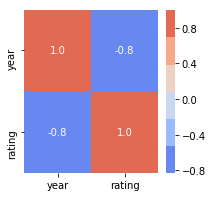

In [425]:
#также чтобы полностью убедиться в этом, посмотрим на линейную зависимость между значением года и средним рейтингом
import seaborn as sns
f, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(jd_excl1900.corr(), annot=True, fmt='.1f', ax=ax, cmap=sns.color_palette('coolwarm', 6))
#видим довольно сильную отрицательную зависимость (коэффициент корреляции -0,8), т.е. с ростом года выпуска в среднем 
#фильмы действительно получают более низкую оценку зрителей

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


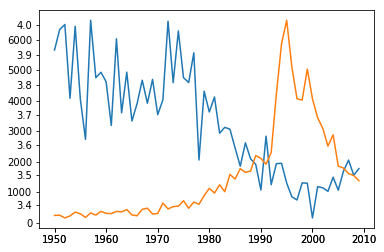

In [462]:
#есть мысль, что такая зависимость обусловлена тем, что более ранние фильмы пересматривает все меньше людей и ввиду 
#этого меньше появляется хэйтеров, опускающих рейтинги
#подтянем также количество записей о выставленных рейтингах по году, исключив 1900, и также 
jd2=joined.groupby('year').agg({'rating':'mean', 'movieId':'count'}).reset_index()
jd2_excl1900=jd2[jd2['year']!=1900]
#для удобства переименуем заголовки
jd2_excl1900.rename(columns={'rating': 'avg_rating', 'movieId': 'cnt_recs'}, inplace=True)

#видим на графике видно как при росте количества записей об отзывах(оранжевый) падает средний рейтинг(синий), 
#это происходит с приближением даты выпуска к 2010му году 

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax.plot(jd2_excl1900['year'], jd2_excl1900['avg_rating'], color="C0")
ax2.plot(jd2_excl1900['year'], jd2_excl1900['cnt_recs'], color="C1")
plt.show()

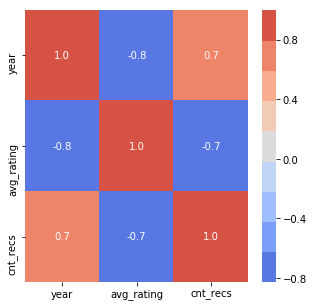

In [461]:
#коэффициенты корреляции также доказывают, что есть обратная зависимость от количества отзывов и рейтингом (-0,7) по году
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(jd2_excl1900.corr(), annot=True, fmt='.1f', ax=ax, cmap=sns.color_palette('coolwarm',9))
#уверен, есть зависимость между возрастом пользователей и отметками фильмам, скажем чем старше человек, тем меньше его 
#можно зацепить новой историей, так как все подобное он уже видел, а впечатлительная молодежь составляет меньшую долю 
#в общем количестве оценок и их хорошие оценки тонут, подавленные основной циничной массой отзывов :) а может и нет
#к сожалению соответствующих данных нет, чтобы проверить

NameError: name 'plt2' is not defined

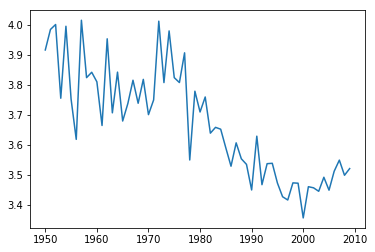

In [453]:
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax.plot(jd2_excl1900['year'], jd2_excl1900['avg_rating'], color="C0")
ax2.plot(jd2_excl1900['year'], jd2_excl1900['cnt_recs'], color="C1")
plt.show()

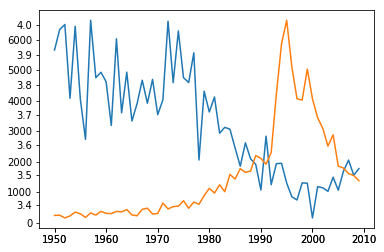

In [457]:
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax.plot(jd2_excl1900['year'], jd2_excl1900['avg_rating'], color="C0")
ax2.plot(jd2_excl1900['year'], jd2_excl1900['cnt_recs'], color="C1")
plt.show()